<a href="https://colab.research.google.com/github/AndrewMbithi/Data-Science-Projects/blob/master/Active-Projects/Copy_of_TSF_Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Define parameters for plots

In [45]:
from matplotlib.pylab import rcParams
plt.rcParams ['figure.figsize'] = (12, 5)
plt.rcParams ['axes.grid'] = False
plt.rcParams ['font.size'] = 10
plt.rcParams ['font.style'] = 'normal'

importing Dataset


In [46]:
dataset = pd.read_csv("AirPassengers.csv")
#Parse strings to datetime type
dataset ['Month'] = pd.to_datetime (dataset [ 'Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [47]:
print(indexedDataset.info())
print('')
print(indexedDataset.describe(). round(decimals=2))
print('')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

       #Passengers
count       144.00
mean        280.30
std         119.97
min         104.00
25%         180.00
50%         265.50
75%         360.50
max         622.00



In [48]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualising Dataset


Dataset Visualization
-----------



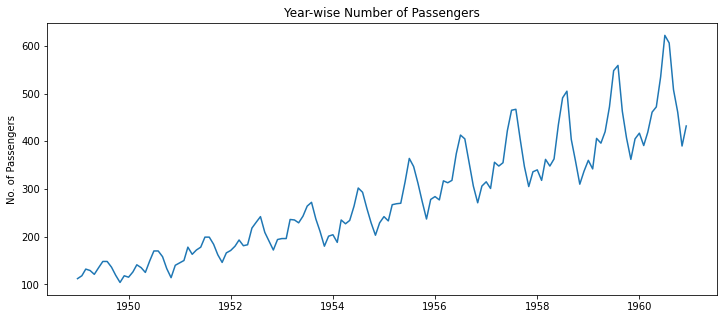

In [49]:
print('')
print('Dataset Visualization')
print('-----------')
print('')
plt.plot(indexedDataset)
plt.title('Year-wise Number of Passengers')
plt.ylabel('No. of Passengers')
plt.show()


Calculate Moving avarage and rolling standard deviation


In [50]:
moving_avg = indexedDataset.rolling (window=12).mean()
moving_std = indexedDataset.rolling (window=12).std()

print(moving_avg)
print(moving_std) 

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Plotting rolling statistics

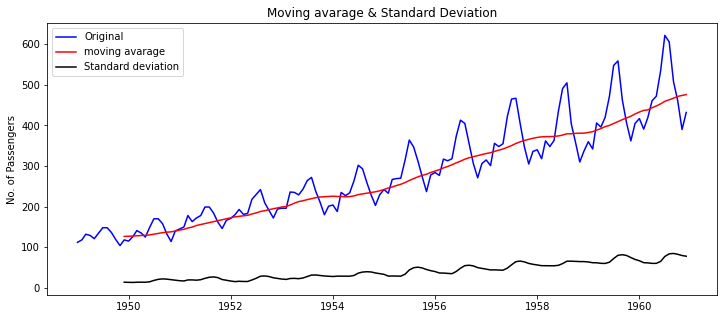

In [51]:
actual = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label= 'moving avarage')
std = plt.plot(moving_std, color='black', label = 'Standard deviation')
plt.legend (loc='best')
plt.title('Moving avarage & Standard Deviation')
plt.ylabel('No. of Passengers')
plt.show()

Perform stationarity check using Augmented Dickey-fuller test

In [52]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
print ( '---------')
print('')
print('Null Hypothesis (Ho): Data is not Stationary')
print('Alternate Hypothesis (H1): Data is Stationary')
print('')

print ('Results of Dickey-Fuller Test:')
dftest = adfuller (indexedDataset ['#Passengers'], autolag='AIC')

dfoutput = pd. Series (dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest [4].items():
  dfoutput['Critical Value (%s) '%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Custom function to test sationarity using rolling stats and ADF 

In [53]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot rolling statistics:
  print ('Stationarity Check:')
  print ( '---------')
  print('')
  
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot (movingSTD, color='black', label= 'Rolling Std')
  plt.legend (loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print ('Results of Dickey-Fuller Test:')
  print ( '---------')
  print('')
  print('Null Hypothesis (Ho): Data is not Stationary')
  print('Alternate Hypothesis (H1): Data is Stationary')
  print('')

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller (timeseries ['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest [4].items():
    dfoutput['Critical Value (%s) '% key] = value
  print (dfoutput)



1. Log Transformation

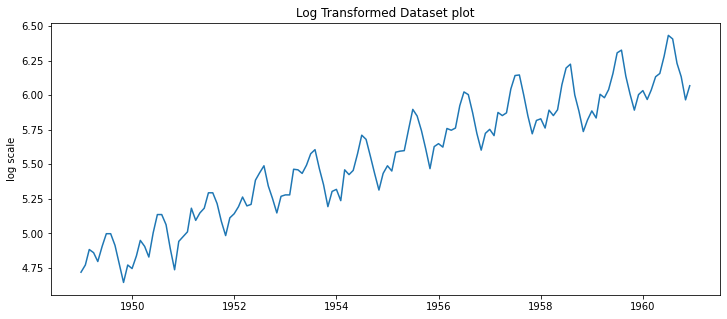

In [54]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)
plt.title('Log Transformed Dataset plot')
plt.ylabel('log scale')
plt.show()


Stationarity check of Log transformation

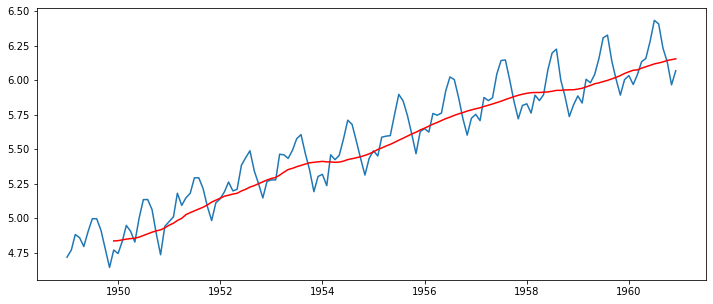

In [55]:

movingAverage = indexedDataset_logScale.rolling (window=12).mean()
movingSTD = indexedDataset_logScale.rolling (window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color="red")

2. Difference of MA and N.o of passengers + Remove nan values

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.282363
1960-09-01     0.098235
1960-10-01    -0.009230
1960-11-01    -0.182690
1960-12-01    -0.085789

[144 rows x 1 columns]



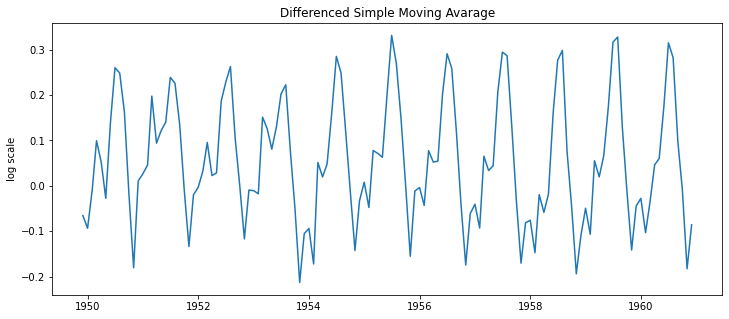

Stationarity Check:
---------



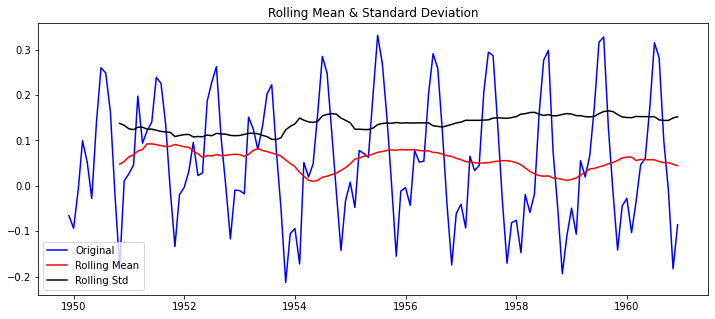

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [56]:
indexedDataset_logscale_moving_avg = indexedDataset_logScale.rolling(12).mean()
indexedDataset_log_difference = indexedDataset_logScale -indexedDataset_logscale_moving_avg
print(indexedDataset_log_difference)

#Removing 'NaN or null values otherwise in the ADF test it will throw error:'

indexedDataset_log_difference.dropna(inplace= True)
#Plotting the Dataset after subtracting Log transformed moving avg values from the log transformed values:
print( )
plt.plot(indexedDataset_log_difference)
plt.title('Differenced Simple Moving Avarage')
plt.ylabel('log scale')
plt.show()

#Performing Test of Stationarity:
test_stationarity(indexedDataset_log_difference)

3. Differencing exponencial moving avarage


Exponential Moving Average:
--------

            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.745345
1949-03-01     4.793835
1949-04-01     4.811785
1949-05-01     4.808206
...                 ...
1960-08-01     6.046445
1960-09-01     6.056778
1960-10-01     6.061079
1960-11-01     6.055750
1960-12-01     6.056461

[144 rows x 1 columns]

log transformed vs log transformed moving average



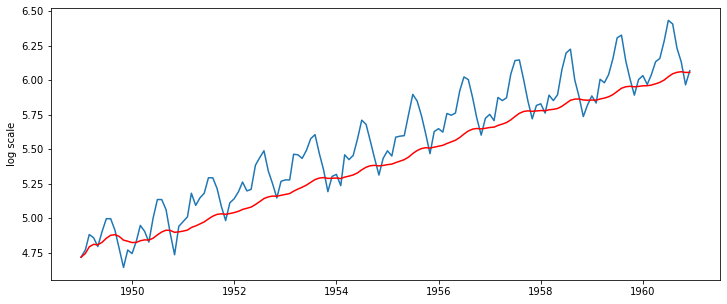


Differenced Exponential Moving Average:
-------

            #Passengers
Month                  
1949-01-01     0.000000
1949-02-01     0.025339
1949-03-01     0.088967
1949-04-01     0.048028
1949-05-01    -0.012415
...                 ...
1960-08-01     0.360435
1960-09-01     0.173704
1960-10-01     0.072319
1960-11-01    -0.089603
1960-12-01     0.011964

[144 rows x 1 columns]
Stationarity Check:
---------



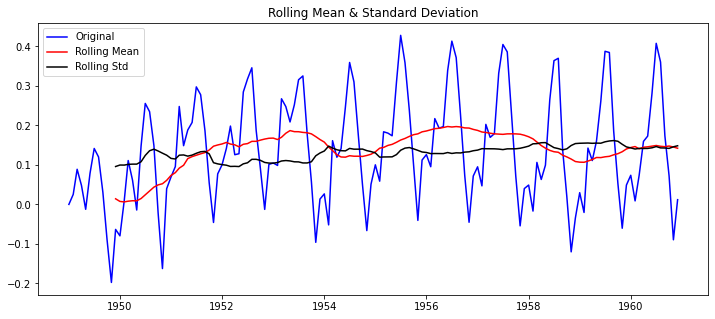

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [57]:
# Step 1: Finding exponential moving average of the Log transformed data:
indexedDataset_log_ema= indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
print('')
print('Exponential Moving Average:')
print('--------')
print('')
print(indexedDataset_log_ema)

#Step 2: Visualization of 'log transformed data' & 'Log transformed exponential moving average':
print('')
print('log transformed vs log transformed moving average')
print('')
plt.plot(indexedDataset_logScale)
plt.plot(indexedDataset_log_ema, color='red')
plt.ylabel('log scale')
plt.show()
#Step 3: Subtracting the exponential moving avg from the log transformed values:
indexedDataset_log_ema_difference= indexedDataset_logScale - indexedDataset_log_ema
print('')
print('Differenced Exponential Moving Average:')
print('-------')
print('')
print(indexedDataset_log_ema_difference)

test_stationarity(indexedDataset_log_ema_difference)

4. Differencing previous value


Shifted log values:
------

            #Passengers
Month                  
1949-02-01     0.052186
1949-03-01     0.112117
1949-04-01    -0.022990
1949-05-01    -0.064022
1949-06-01     0.109484
...                 ...
1960-08-01    -0.026060
1960-09-01    -0.176399
1960-10-01    -0.097083
1960-11-01    -0.167251
1960-12-01     0.102279

[143 rows x 1 columns]

log transformed vs log transformed shifted data



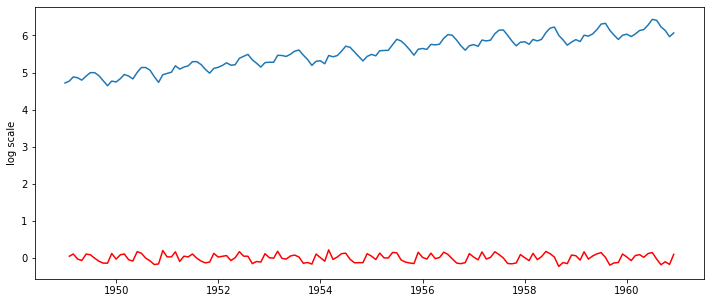

Stationarity Check:
---------



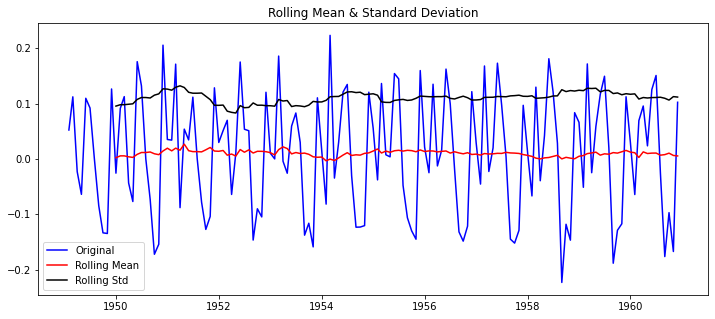

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [58]:
#Step 1: Subtracting present Log scale values from its previous values:
indexedDataset_log_shift = indexedDataset_logScale- indexedDataset_logScale.shift()
indexedDataset_log_shift.dropna(inplace= True)
print('')
print('Shifted log values:')
print('------')
print('')
print(indexedDataset_log_shift)
#Step 2: Visualizing shifted data:
print('')
print('log transformed vs log transformed shifted data')
print('')
plt.plot(indexedDataset_logScale)
plt.plot(indexedDataset_log_shift, color='red')
plt.ylabel('log scale')
plt.show()

#Step 3: Test of stationarity:
test_stationarity(indexedDataset_log_shift)

4. a) Differencing previous 2 values


Shifted log values:
------

            #Passengers
Month                  
1949-03-01     0.164303
1949-04-01     0.089128
1949-05-01    -0.087011
1949-06-01     0.045462
1949-07-01     0.201422
...                 ...
1960-08-01     0.124613
1960-09-01    -0.202459
1960-10-01    -0.273482
1960-11-01    -0.264335
1960-12-01    -0.064972

[142 rows x 1 columns]

log transformed vs log transformed shifted data



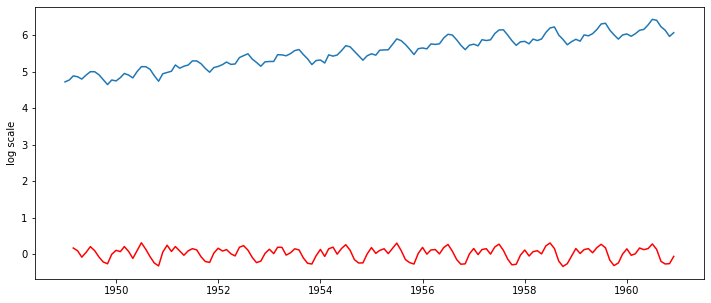

Stationarity Check:
---------



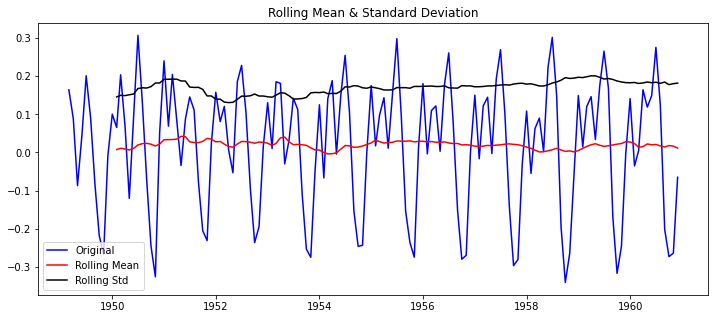

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [59]:
#Step 1: Subtracting present Log scale values from its previous values:
indexedDataset_log_shift2 = indexedDataset_logScale- indexedDataset_logScale.shift(2)
indexedDataset_log_shift2.dropna(inplace= True)
print('')
print('Shifted log values:')
print('------')
print('')
print(indexedDataset_log_shift2)
#Step 2: Visualizing shifted data:
print('')
print('log transformed vs log transformed shifted data')
print('')
plt.plot(indexedDataset_logScale)
plt.plot(indexedDataset_log_shift2, color='red')
plt.ylabel('log scale')
plt.show()

#Step 3: Test of stationarity:
test_stationarity(indexedDataset_log_shift2)

5. Seasonal Decompositon


Plot showing decomposed dataset:
-------------------



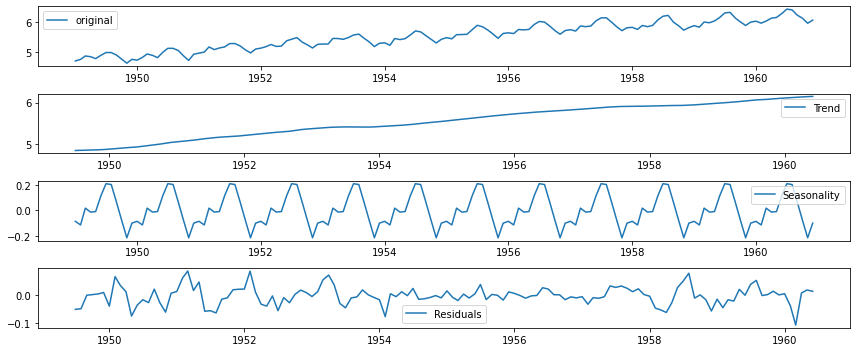

Stationarity Check:
---------



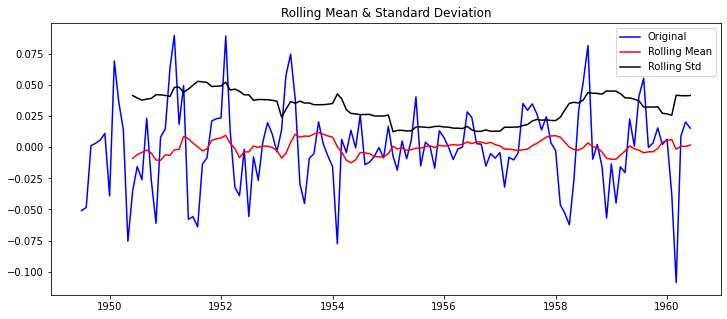

Results of Dickey-Fuller Test:
---------

Null Hypothesis (Ho): Data is not Stationary
Alternate Hypothesis (H1): Data is Stationary

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [66]:
#Step 1: Decomposing the Log transformed dataset into it's Trend, Seasonal and Cylical components:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
print('')
print('Plot showing decomposed dataset:')
print('-------------------')
print('')

#Step 2: Plotting the decomposed dataset:
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc= 'best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#step 3: test stationarity

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
decomposedLogData = pd.DataFrame(decomposedLogData)
decomposedLogData.columns = ["#Passengers"]
test_stationarity(decomposedLogData)

Plot ACF and  to find lags

In [75]:

# Step 1: ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from math import sqrt
lag_acf = acf(indexedDataset_log_shift, nlags=20)
lag_pacf = pacf(indexedDataset_log_shift, nlags=20, method='ols')

#Step 2: Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--' ,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_log_shift)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_log_shift)),linestyle = '--' color='gray')
plt.title('Autocorrelation Function')

#Step 3: Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle ='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_log_shift)),linestyle = '--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_log_shift)),linestyle = '--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

SyntaxError: ignored

import ARIMA

AR model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


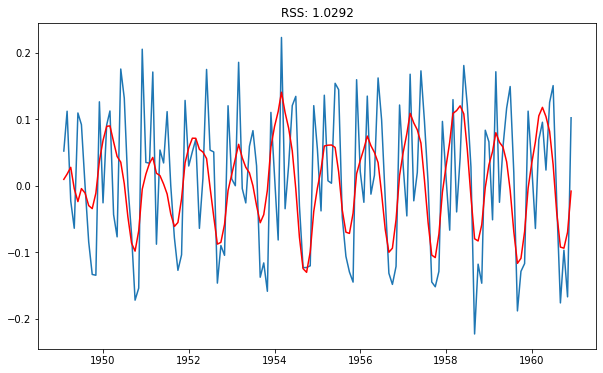

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL

model = ARIMA (indexedDataset_logScale, order=(2, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR. fittedvalues, color="red")
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

MA model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


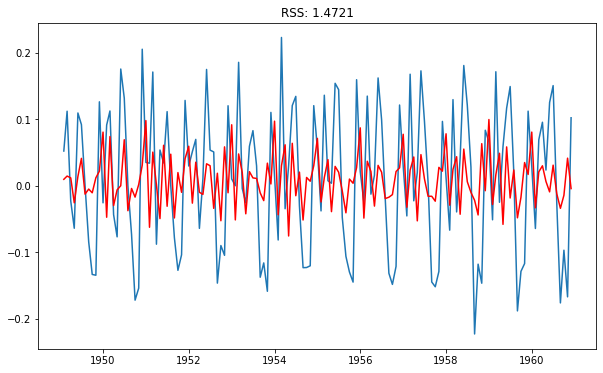

In [ ]:
#MA MODEL
model = ARIMA (indexedDataset_logScale, order=(0,1, 2))
results_MA = model.fit (disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

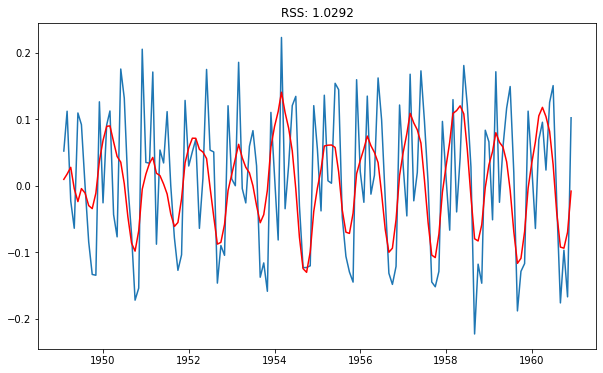

In [ ]:
model = ARIMA (indexedDataset_logScale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA. fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

In [ ]:
predictions_ARIMA_diff = pd. Series (results_ARIMA. fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

AttributeError: ignored